In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, roc_curve, auc
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [22]:
file_list_pos = ['124-DOD-tts_all.csv','103-DOD-tts_all.csv','120-DOD-tts_all.csv','121-DOD-tts_all.csv','122-DOD-tts_all.csv','123-DOD-tts_all.csv','101-DOD-tts_all.csv','102-DOD-tts_all.csv','104-DOD-tts_all.csv','106-DOD-tts_all.csv','108-DOD-tts_all.csv','109-DOD-tts_all.csv','110-DOD-tts_all.csv','111-DOD-tts_all.csv','112-DOD-tts_all.csv','113-DOD-tts_all.csv','114-DOD-tts_all.csv','115-DOD-tts_all.csv','117-DOD-tts_all.csv','118-DOD-tts_all.csv']
file_list_neg = ['213-DOD-tts_all.csv','214-DOD-tts_all.csv','215-DOD-tts_all.csv','216-DOD-tts_all.csv','217-DOD-tts_all.csv','218-DOD-tts_all.csv','202-DOD-tts_all.csv','203-DOD-tts_all.csv','204-DOD-tts_all.csv','205-DOD-tts_all.csv','207-DOD-tts_all.csv','209-DOD-tts_all.csv','210-DOD-tts_all.csv','211-DOD-tts_all.csv','212-DOD-tts_all.csv']


In [23]:
# create empty arrays to store the data
X_pos = np.empty((0, 294))
X_neg = np.empty((0, 294))
y_pos = np.ones(0)
y_neg = np.zeros(0)

In [24]:
# read and concatenate the positive data
for file in file_list_pos:
    df = pd.read_csv(file, header=0)
    X_pos = np.concatenate((X_pos, df.values))
    y_pos = np.concatenate((y_pos, np.ones(len(df))))
df.head()

,s1,s10,s100,s101,s102,s103,s104,s105,s106,s107,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,-6.850518,-29.044506,-4.991009,1.420631,20.410086,-6.946770,7.103333,9.044143,19.949764,-7.572872,...,1.937912,18.443445,-34.500314,-18.795924,-42.799276,-13.008212,-17.272781,-0.886887,3.747091,-8.763251
1,14.584685,-15.745517,11.724917,13.017166,41.629602,51.660000,17.416352,25.669845,20.075707,-5.805461,...,-6.283510,47.076383,21.223968,-2.636846,13.325436,5.254674,-3.636204,14.907664,23.586997,1.872963
2,3.004609,26.502823,-0.442655,19.966263,32.714891,-10.813696,-3.606790,-1.007820,25.476118,-0.110212,...,-17.180381,69.517507,23.689586,20.834105,-2.277219,2.880319,14.010528,3.838456,-23.299419,-5.364819
3,34.821628,0.736197,12.994764,-23.934242,-20.089545,-64.920695,-27.410042,-9.587236,-42.133409,-6.281087,...,6.179292,-69.526289,11.237383,-3.705414,28.355553,-10.109636,15.141455,-9.862725,-7.056860,23.483120
4,44.372803,26.383753,-13.565284,-21.719613,-21.503335,5.453369,-7.001571,-33.274653,-22.711016,19.175947,...,11.432835,25.777959,16.507430,6.819935,-11.308337,26.224166,10.707200,6.209558,-17.282781,-11.628698


In [25]:
# read and concatenate the negative data
for file in file_list_neg:
    df = pd.read_csv(file, header=0)
    X_neg = np.concatenate((X_neg, df.values))
    y_neg = np.concatenate((y_neg, np.zeros(len(df))))
df

,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s285,s286,s287,s288,s289,s290,s291,s292,s293,s294
0,-19.912384,-18.078062,14.916045,96.136721,-22.157080,-65.205713,-65.698056,44.076839,41.749397,-35.604139,...,-20.890776,-51.023686,-31.903195,-29.017396,13.651594,21.414456,39.500190,-4.204865,-173.992887,-113.067050
1,-0.626003,-30.259195,15.203211,13.360549,6.518580,-26.015850,-255.159306,68.381255,17.191708,-32.823189,...,-53.374408,32.718168,23.001357,-48.191280,11.476471,18.365609,49.168744,38.967156,-99.201904,-200.385329
2,-39.863514,-106.912506,33.690346,33.461618,49.933073,-74.188407,-104.976298,-46.696773,10.083909,-32.521913,...,73.809376,85.151320,57.583092,16.260442,19.985228,33.621014,60.929233,25.827981,39.328441,81.291920
3,72.751657,69.639107,6.063154,-40.071781,-25.440358,162.850103,-14.723150,87.044162,-7.939886,2.320697,...,82.849896,34.651947,18.458814,113.244077,-8.183915,11.275423,9.520768,35.839683,53.938292,32.602816
4,-18.117010,10.434640,36.209556,77.048607,46.385112,102.311891,161.782161,17.690777,22.037369,1.143048,...,-7.180394,-22.654356,92.580888,25.227744,-10.316810,-25.288489,-29.621690,38.425728,148.603805,96.069158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,6.785416,10.516494,12.285988,2.770832,-44.870480,-2.729061,49.642401,-45.855794,12.822562,8.880534,...,-53.724423,-48.493600,42.397361,24.781387,-20.451990,32.763812,4.590958,28.359378,-57.551494,-45.804623
371,-0.756304,-41.504456,24.208684,-97.602719,24.141050,15.477192,-60.939872,71.881030,-29.379168,14.462071,...,34.209160,55.868053,69.127227,18.200569,19.256210,46.703615,9.796888,-29.870123,-29.230635,-51.247075
372,42.827964,20.562045,45.157531,31.343080,-3.209242,-52.099753,3.627609,5.570785,-9.495092,5.575286,...,146.392352,77.691906,109.852253,101.277500,25.159962,-14.775866,16.564930,40.268341,-95.147946,-139.224131
373,26.505992,32.085705,80.225576,-41.360990,0.138803,117.292426,86.700850,-29.562057,28.753316,-28.105690,...,84.792007,27.949352,21.628399,62.822849,20.320232,16.932831,46.342235,56.680862,9.223896,42.871386


In [26]:
X = np.concatenate((X_pos, X_neg))
y = np.concatenate((y_pos, y_neg))


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
X_train = X_train.reshape(-1, 1, 294)
X_test = X_test.reshape(-1, 1, 294)


In [30]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(1, 294)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:


# Define a function to preprocess the new data
def preprocess_new_data(data):
    # Perform the same preprocessing steps as before
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    data = data.reshape(-1, 1, 294)
    return data

# Define a function to make predictions on new data
def predict_tbi(model, data):
    # Preprocess the new data
    preprocessed_data = preprocess_new_data(data)
    # Make predictions
    predictions = model.predict(preprocessed_data)
    # Convert the predictions to binary values
    binary_predictions = np.round(predictions)
    # Return the binary predictions
    return binary_predictions

In [32]:
model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
329/329 [==============================] - 6s 9ms/step - loss: 0.5563 - accuracy: 0.7070
Epoch 2/25
329/329 [==============================] - 3s 9ms/step - loss: 0.2916 - accuracy: 0.9121
Epoch 3/25
329/329 [==============================] - 3s 10ms/step - loss: 0.1361 - accuracy: 0.9765
Epoch 4/25
329/329 [==============================] - 3s 8ms/step - loss: 0.0635 - accuracy: 0.9962
Epoch 5/25
329/329 [==============================] - 3s 8ms/step - loss: 0.0308 - accuracy: 0.9997
Epoch 6/25
329/329 [==============================] - 2s 8ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 7/25
329/329 [==============================] - 2s 5ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 8/25
329/329 [==============================] - 2s 6ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 9/25
329/329 [==============================] - 2s 5ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 10/25
329/329 [==============================] - 2s 5ms/step - loss: 0.0035 - accuracy: 1.000

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


83/83 [==============================] - 1s 2ms/step - loss: 0.2313 - accuracy: 0.9269
Test loss: 0.2313052862882614
Test accuracy: 0.9268571138381958


In [34]:
# Predict the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

83/83 [==============================] - 1s 3ms/step


In [35]:

# Calculate the evaluation metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
mae = np.mean(np.abs(y_pred - y_test))
mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)

In [36]:
# Print the evaluation metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

F1 Score: 0.9367172050098878
Precision: 0.9209332469215813
Recall: 0.9530516431924883
Confusion Matrix:
 [[1012  122]
 [  70 1421]]
Accuracy: 0.9268571428571428
Mean Absolute Error (MAE): 0.48805790476190475
Mean Squared Error (MSE): 0.48805790476190475
Root Mean Squared Error (RMSE): 0.6986114118463173


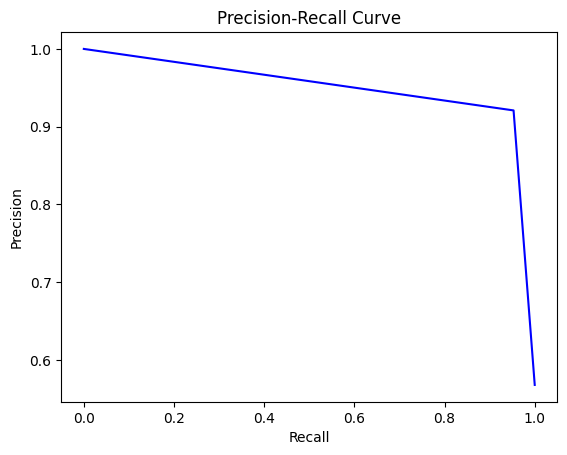

In [37]:
from sklearn.metrics import precision_recall_curve


# Calculate precision and recall values for different threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

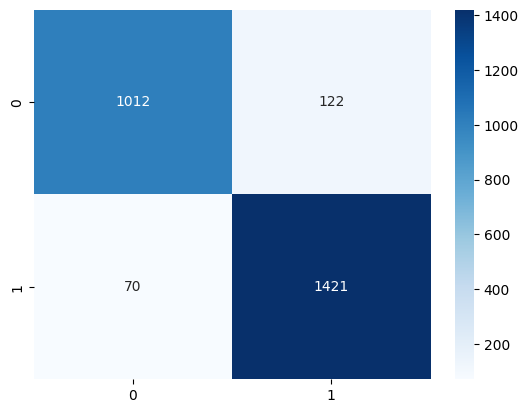

In [38]:
confusion_gbc = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_gbc, annot=True, cmap='Blues', fmt='g')
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
plt.show()

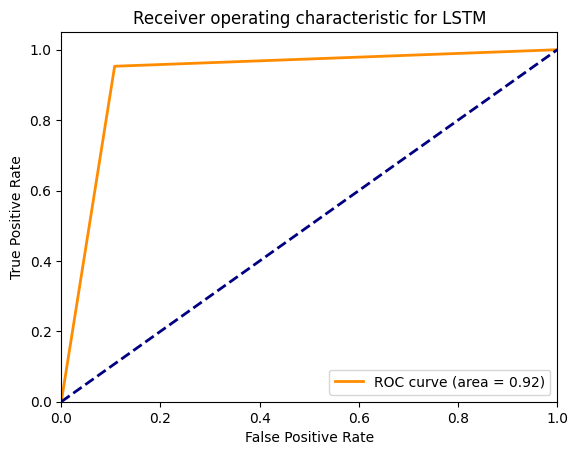

In [39]:
# Compute ROC curve and ROC area for NB
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, y_pred)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
# Plot ROC curve for NB
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lstm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

In [40]:
file_list = ['103-DOD-tts_all.csv','120-DOD-tts_all.csv','121-DOD-tts_all.csv','122-DOD-tts_all.csv','123-DOD-tts_all.csv','101-DOD-tts_all.csv','102-DOD-tts_all.csv','104-DOD-tts_all.csv','106-DOD-tts_all.csv','108-DOD-tts_all.csv','109-DOD-tts_all.csv','110-DOD-tts_all.csv','111-DOD-tts_all.csv','112-DOD-tts_all.csv','113-DOD-tts_all.csv','114-DOD-tts_all.csv','115-DOD-tts_all.csv','117-DOD-tts_all.csv','118-DOD-tts_all.csv','124-DOD-tts_all.csv','213-DOD-tts_all.csv','214-DOD-tts_all.csv','215-DOD-tts_all.csv','216-DOD-tts_all.csv','217-DOD-tts_all.csv','218-DOD-tts_all.csv','202-DOD-tts_all.csv','203-DOD-tts_all.csv','204-DOD-tts_all.csv','205-DOD-tts_all.csv','207-DOD-tts_all.csv','209-DOD-tts_all.csv','210-DOD-tts_all.csv','211-DOD-tts_all.csv','212-DOD-tts_all.csv']

for file in file_list:
    # Read in the patient data from a CSV file
    new_data = pd.read_csv(file, header=0)
    
    # Make predictions on the new data
    predictions = predict_tbi(model, new_data)

    # Output the predicted value
    if predictions[0] == 1:
        print(f"{file}: The patient has TBI")
    else:
        print(f"{file}: The patient does not have TBI")

12/12 [==============================] - 0s 2ms/step
103-DOD-tts_all.csv: The patient has TBI
12/12 [==============================] - 0s 2ms/step
120-DOD-tts_all.csv: The patient has TBI
12/12 [==============================] - 0s 2ms/step
121-DOD-tts_all.csv: The patient has TBI
12/12 [==============================] - 0s 2ms/step
122-DOD-tts_all.csv: The patient has TBI
12/12 [==============================] - 0s 3ms/step
123-DOD-tts_all.csv: The patient has TBI
12/12 [==============================] - 0s 2ms/step
101-DOD-tts_all.csv: The patient has TBI
12/12 [==============================] - 0s 3ms/step
102-DOD-tts_all.csv: The patient has TBI
12/12 [==============================] - 0s 2ms/step
104-DOD-tts_all.csv: The patient has TBI
12/12 [==============================] - 0s 3ms/step
106-DOD-tts_all.csv: The patient has TBI
12/12 [==============================] - 0s 2ms/step
108-DOD-tts_all.csv: The patient has TBI
12/12 [==============================] - 0s 2ms/step
109-DOD